In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
import scipy
rcParams['figure.figsize'] = 20, 10

In [2]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [7]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','RWWIHOB_HWT0','RWWIHOB_MWT0',
#                            'AEDAHO_T9_V2','AEWIHO_T9AV2'] # choose column with which the following work will be conducted
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','RWWIHOB_HWT0','RWWIHOB_MWT0',
#                            'AEWIHO_T9AV2','AEDAHO_T9_V2']

# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99



# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','RWWIHOB_HWT0','RWWIHOB_MWT0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.85


multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38
size_column = len(multivariate_column_label)
print(size_column)

6


In [8]:
multivariate_data=test_new.iloc[4000:10000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]
print(multivariate_data.head())

                     DEWIHOBT9_I0  AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  \
dateTime                                                                      
2019-04-06 00:21:00         100.0     97.879662     98.113751     40.574666   
2019-04-06 00:22:00         100.0     97.860454     98.078034     39.990227   
2019-04-06 00:23:00         100.0     97.670519     97.896256     39.577443   
2019-04-06 00:24:00         100.0     97.754863     97.978785     39.685303   
2019-04-06 00:25:00         100.0     97.926736     98.161078     39.782918   

                     AEDAHO_T9_V2  AEWIHO_T9AV2  
dateTime                                         
2019-04-06 00:21:00     72.427071     76.598087  
2019-04-06 00:22:00     71.620643     76.358689  
2019-04-06 00:23:00     70.606738     77.241097  
2019-04-06 00:24:00     70.531626     77.062413  
2019-04-06 00:25:00     70.692115     76.297974  


In [18]:
multivariate_data_resam = multivariate_data.resample('1min').mean()

In [26]:
multivariate_data_resam.interpolate('linear')

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,AEWIHO_T9AV2
dateTime,,,,,,
2019-04-06 00:21:00,100.0,97.879662,98.113751,40.574666,72.427071,76.598087
2019-04-06 00:22:00,100.0,97.860454,98.078034,39.990227,71.620643,76.358689
2019-04-06 00:23:00,100.0,97.670519,97.896256,39.577443,70.606738,77.241097
2019-04-06 00:24:00,100.0,97.754863,97.978785,39.685303,70.531626,77.062413
2019-04-06 00:25:00,100.0,97.926736,98.161078,39.782918,70.692115,76.297974
2019-04-06 00:26:00,100.0,97.034305,97.257554,40.081800,71.287597,76.208632
2019-04-06 00:27:00,100.0,96.765111,97.028838,42.598666,76.285867,76.325657
2019-04-06 00:28:00,100.0,96.754298,97.030366,43.278347,78.329860,77.047628
2019-04-06 00:29:00,100.0,96.898693,97.180894,43.784481,79.178653,81.684913


In [27]:
multivariate_data_resam.corr()

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,AEWIHO_T9AV2
DEWIHOBT9_I0,NaN,NaN,NaN,NaN,NaN,NaN
AEDATZ_HONP0,NaN,1.000000,0.998904,0.020692,0.083349,0.007768
AEDATZK_ASP0,NaN,0.998904,1.000000,0.048066,0.107792,0.029179
AEDATZ_HO_V0,NaN,0.020692,0.048066,1.000000,0.692650,0.467498
AEDAHO_T9_V2,NaN,0.083349,0.107792,0.692650,1.000000,0.774322
AEWIHO_T9AV2,NaN,0.007768,0.029179,0.467498,0.774322,1.000000


In [105]:
# # multivariate_column_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0',
# #                            'RWWIHOA_MWT0','AEDAHO_T9_V2'] # choose column with which the following work will be conducted
# univariate_column_label=['AEDAHO_T9_V2']

# multivariate_column_label=['AEDATZ_HO_V0', 'AEWIHO_T9AV2','AEDAHO_T9_V2']
# multivariate_data=test_new.iloc[2000:8000][multivariate_column_label] #just for checking whether it is working or not

In [106]:
# multivariate_data=multivariate_data.loc[::-1]

In [107]:
# print(multivariate_data.tail())

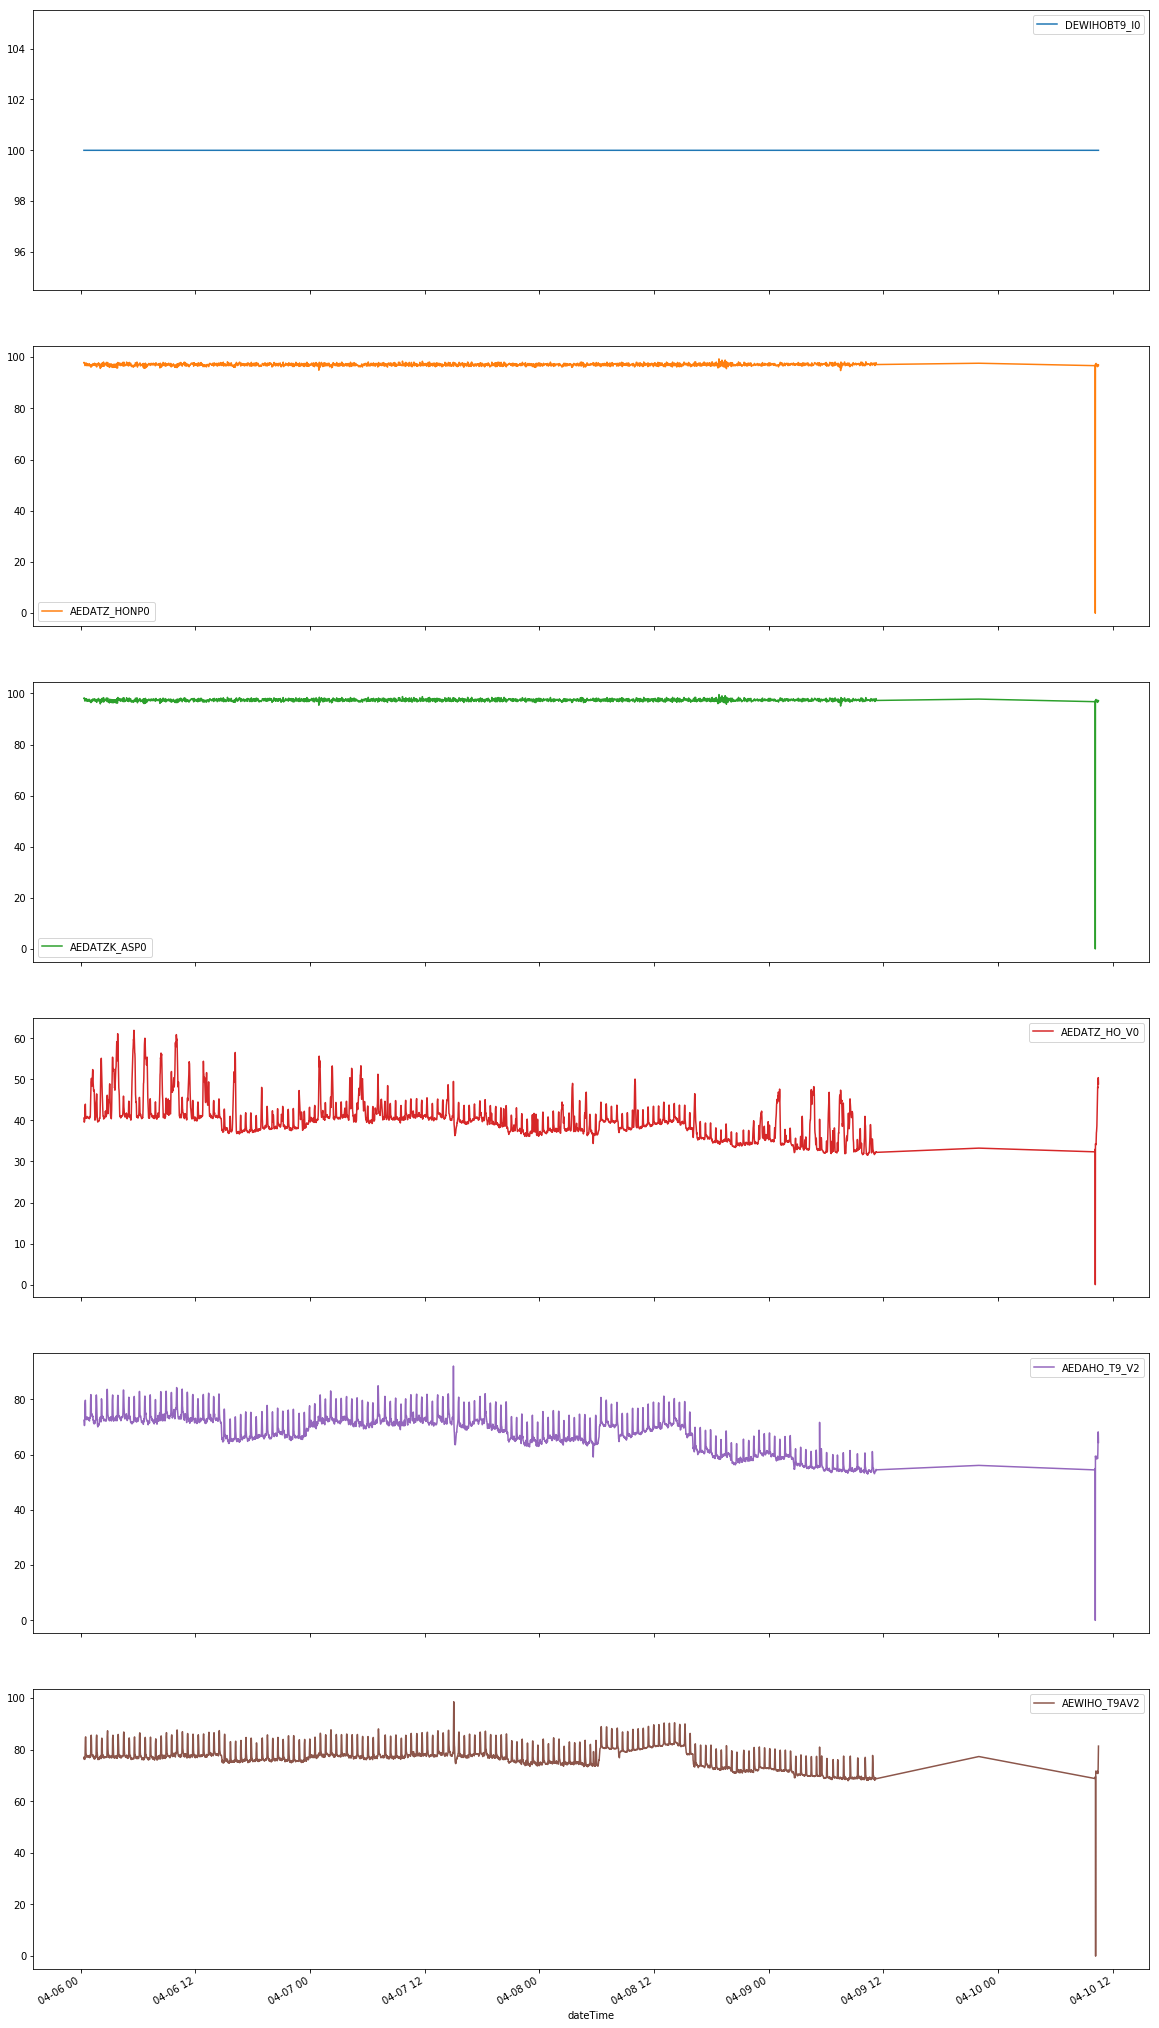

In [10]:
ax = multivariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,40)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Below the row has deleted where DEWIHOBT9_I0 has 'zero' value

In [10]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  0


In [11]:
if zero_index.size > 0:
    multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    multivariate_data_modify = multivariate_data

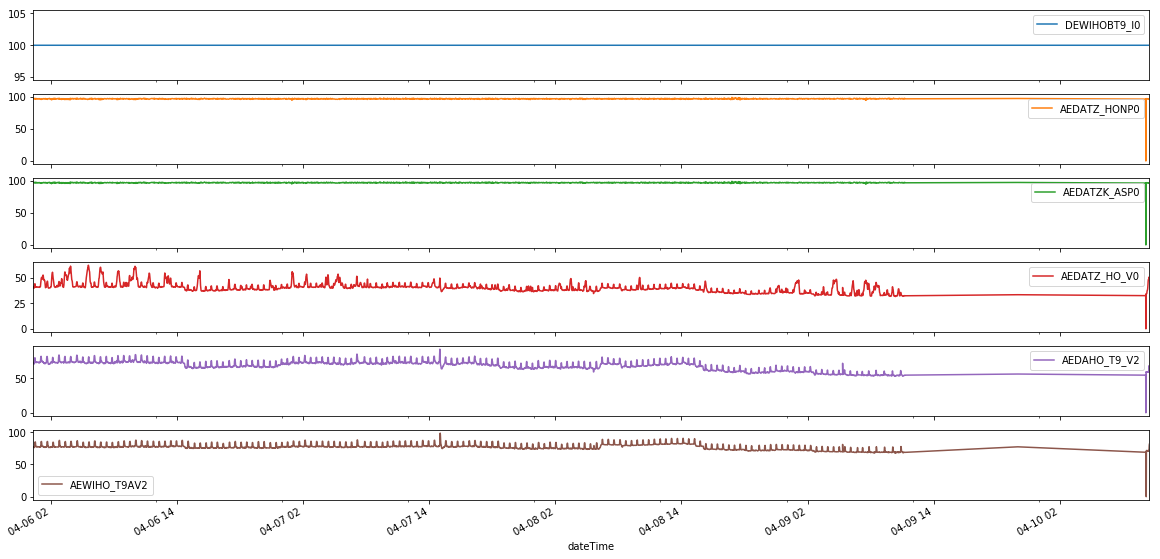

In [12]:
bx = multivariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Below the row will be deleted where any value of any column will be zero

In [13]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data_modify.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

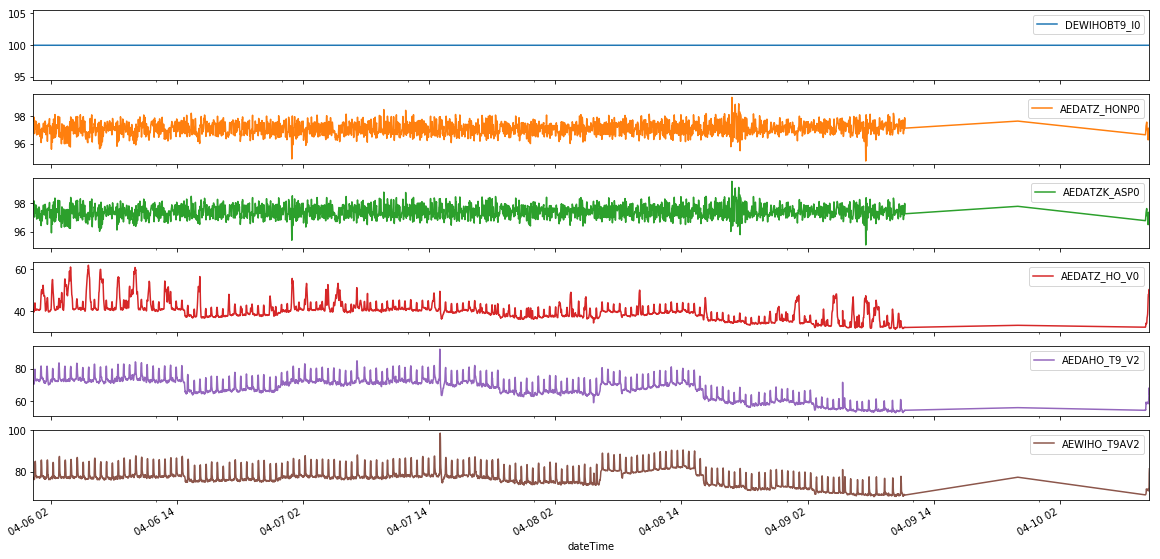

In [14]:
cx = multivariate_data_drop_zero.plot(subplots=True, layout=(size_column,1))
# plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [15]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_modify: ', multivariate_data_modify.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

shape of multivariate_data:  (5000, 6)
shape of multivariate_data_modify:  (5000, 6)
shape of multivariate_data_drop_zero:  (4998, 6)


In [456]:
# # remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
# multi_mean=multivariate_data.mean()
# multivariate_data_mean= multivariate_data.replace(0,multi_mean)

In [457]:
# multivariate_data_mean.plot()
# plt.show()

In [458]:
# from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(multivariate_data_mean)

# df_normalized = pd.DataFrame(np_scaled,index=multivariate_data.index,columns=multivariate_column_label)

In [459]:
# print(df_normalized.tail())

In [460]:
# df_normalized.plot()
# plt.show()

In [16]:
# dataset=np.array(multivariate_data_mean)
dataset=np.array(multivariate_data_drop_zero)

NumberOfElements=int(len(dataset)*0.9)
print('dataset length: ',len(dataset))
print('Number of Elements for training: ',NumberOfElements)

multiple_ip_train_data=dataset[0:NumberOfElements]
print(multiple_ip_train_data.shape)
multiple_ip_test_set=dataset[NumberOfElements:len(dataset)]
print(multiple_ip_test_set.shape)

dataset length:  4998
Number of Elements for training:  4748
(4748, 6)
(250, 6)


In [17]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

C:\Users\atif\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_1):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_1
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [19]:
n_steps_1 = 4
# split into samples
X_ip_cnn_lstm, Y_op_cnn_lstm = split_sequence(multiple_ip_train_data, n_steps_1)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]

In [20]:
print('X_ip_cnn_lstm shape: ',X_ip_cnn_lstm.shape,'\tX_ip_cnn_lstm size: ',X_ip_cnn_lstm.size,'\tX_ip_cnn_lstm dimension: ',X_ip_cnn_lstm.ndim)
print('Y_op_cnn_lstm shape: ',Y_op_cnn_lstm.shape,'\tY_op_cnn_lstm size: ',Y_op_cnn_lstm.size,'\tY_op_cnn_lstm dimension: ',Y_op_cnn_lstm.ndim)

X_ip_cnn_lstm shape:  (4744, 4, 5) 	X_ip_cnn_lstm size:  94880 	X_ip_cnn_lstm dimension:  3
Y_op_cnn_lstm shape:  (4744,) 	Y_op_cnn_lstm size:  4744 	Y_op_cnn_lstm dimension:  1


In [21]:
n_features = X_ip_cnn_lstm.shape[-1]
n_seq = 2
n_steps_2 = 2
train_ip_cnn_lstm = X_ip_cnn_lstm.reshape((X_ip_cnn_lstm.shape[0], n_seq, n_steps_2, n_features))

In [22]:
print('train_ip_cnn_lstm shape: ',train_ip_cnn_lstm.shape,'\ttrain_ip_cnn_lstm size: ',
      train_ip_cnn_lstm.size,'\ttrain_ip_cnn_lstm dimension: ',train_ip_cnn_lstm.ndim)

train_ip_cnn_lstm shape:  (4744, 2, 2, 5) 	train_ip_cnn_lstm size:  94880 	train_ip_cnn_lstm dimension:  4


#  without using validation split you cannot save the best model. Then you can use False instead of True in the return of save_best_only argument

In [30]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def cnn_lstm():
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_2, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    return model
cnn_lstm=cnn_lstm()
cnn_lstm.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

# fit model
# cnn_lstm.fit(train_ip_cnn_lstm,Y_op_cnn_lstm,batch_size=batch_size, epochs=epochs, verbose=1,
#          callbacks=[LearningRateScheduler(lr_schedule),
#                      ModelCheckpoint('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/hh_30.h5',
#                                      save_best_only = True)])

history = cnn_lstm.fit(train_ip_cnn_lstm,Y_op_cnn_lstm,validation_split=0.33,batch_size=batch_size, epochs=epochs, verbose=1)

Train on 3178 samples, validate on 1566 samples
Epoch 1/30
3178/3178 [==============================] - 2s 546us/step - loss: 360.0155 - acc: 0.0000e+00 - val_loss: 12.0245 - val_acc: 0.0000e+00
Epoch 2/30
3178/3178 [==============================] - 0s 123us/step - loss: 4.1552 - acc: 0.0000e+00 - val_loss: 11.9735 - val_acc: 0.0000e+00
Epoch 3/30
3178/3178 [==============================] - 0s 126us/step - loss: 4.1145 - acc: 0.0000e+00 - val_loss: 11.9870 - val_acc: 0.0000e+00
Epoch 4/30
3178/3178 [==============================] - 0s 120us/step - loss: 4.0714 - acc: 0.0000e+00 - val_loss: 11.7023 - val_acc: 0.0000e+00
Epoch 5/30
3178/3178 [==============================] - 0s 121us/step - loss: 3.9961 - acc: 0.0000e+00 - val_loss: 11.6274 - val_acc: 0.0000e+00
Epoch 6/30
3178/3178 [==============================] - 0s 122us/step - loss: 3.9513 - acc: 0.0000e+00 - val_loss: 11.4955 - val_acc: 0.0000e+00
Epoch 7/30
3178/3178 [==============================] - 0s 129us/step - loss: 3.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


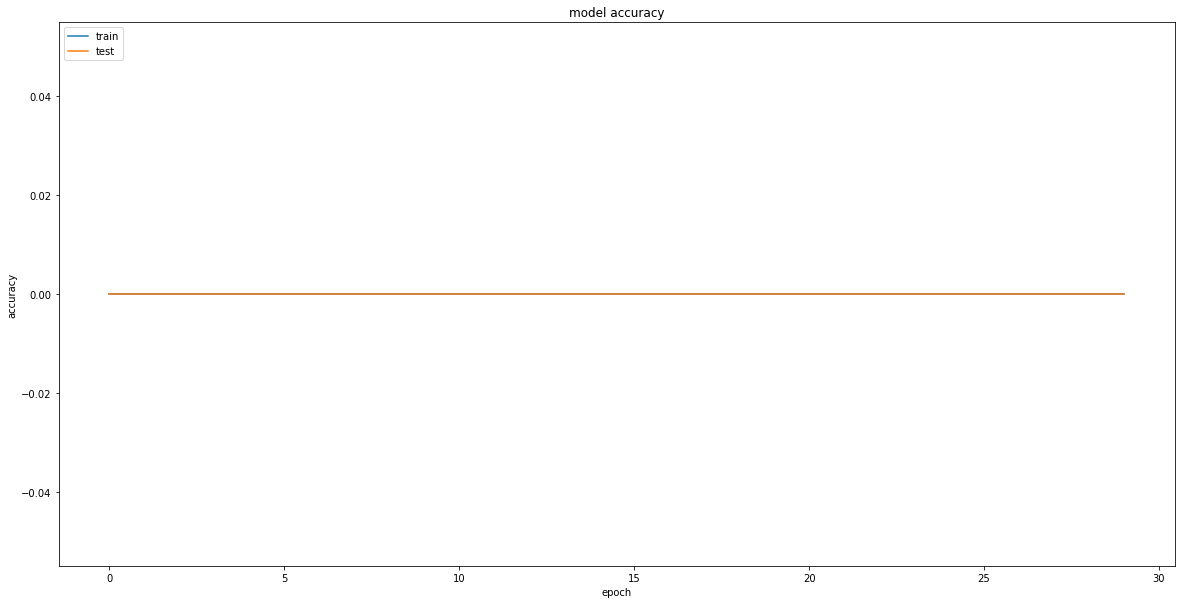

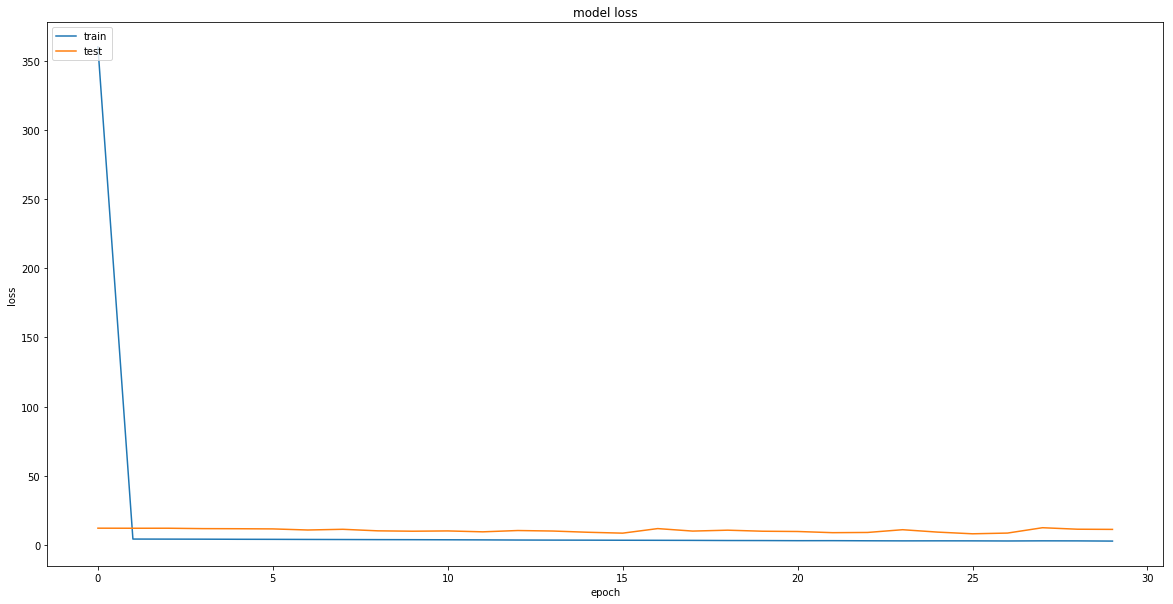

In [31]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
X_CNN_Lstm_test, y_CNN_Lstm_test = split_sequence(multiple_ip_test_set, n_steps_1)

x_input = X_CNN_Lstm_test.reshape((X_CNN_Lstm_test.shape[0], n_seq, n_steps_2, X_CNN_Lstm_test.shape[-1]))

In [33]:
print(x_input.shape)

(246, 2, 2, 5)


In [34]:
# from keras.models import load_model

# load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/CNN_LSTM_norm_30.h5')

yhat = cnn_lstm.predict(x_input, verbose=1)
# print(yhat)

246/246 [==============================] - 0s 1ms/step


In [35]:
# print(y_CNN_Lstm_test)

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from statsmodels import robust

#Print MSE to see how good the model is
Error = mean_squared_error(y_CNN_Lstm_test,yhat)
MAE = mean_absolute_error(y_CNN_Lstm_test, yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
print('MAE: ', MAE)
MAD = robust.mad(yhat)
print('MAD: ',MAD)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE = mean_absolute_percentage_error(y_CNN_Lstm_test, yhat)
print('MAPE: ', MAPE)

mean squared error:  2.4599906940270677
RMSE Error:  1.5684357474971895
MAE:  0.8836796997081755
MAD:  [0.35734275]
MAPE:  2.1666641355955436


In [37]:
# print(y_CNN_Lstm_test.ndim)
# print(yhat.ndim)
y_1 = np.reshape(y_CNN_Lstm_test,(y_CNN_Lstm_test.shape[0],1))
# print(y_1.shape)
# print(y_1.ndim)


Error = mean_squared_error(y_1,yhat)
MAE = mean_absolute_error(y_1, yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
print('MAE: ', MAE)
MAD = robust.mad(yhat)
print('MAD: ',MAD)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE = mean_absolute_percentage_error(y_1, yhat)
print('MAPE: ', MAPE)

MAPE_1 = mean_absolute_percentage_error(y_CNN_Lstm_test, yhat)
print('MAPE_1: ', MAPE_1)

mean squared error:  2.4599906940270677
RMSE Error:  1.5684357474971895
MAE:  0.8836796997081755
MAD:  [0.35734275]
MAPE:  1.2195461378012966
MAPE_1:  2.1666641355955436


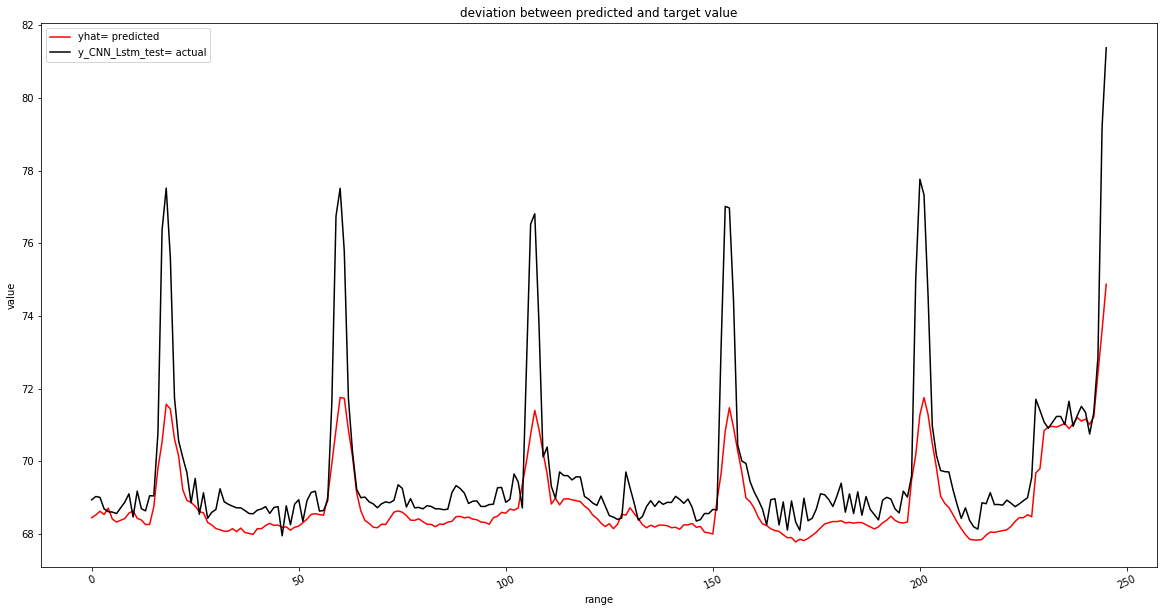

In [38]:
# my_data_1.index[0:-1]
plt.plot(yhat,color='red')
plt.plot(y_CNN_Lstm_test,color='black')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['yhat= predicted', 'y_CNN_Lstm_test= actual'], loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

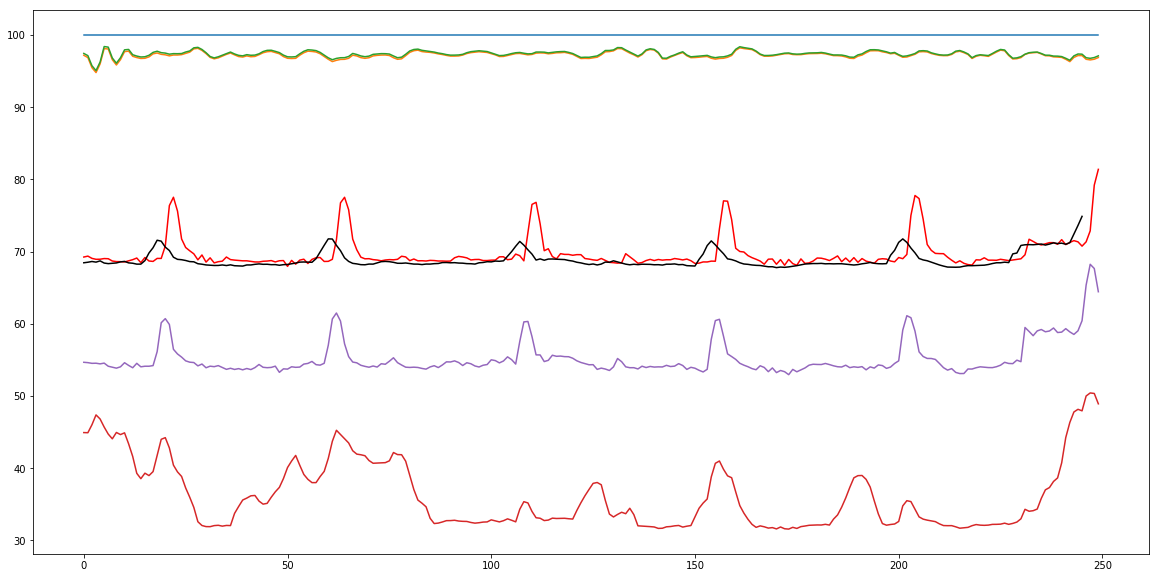

In [44]:
plt.plot(multiple_ip_test_set[:,:-1])
plt.plot(multiple_ip_test_set[:,-1], color = 'red')
plt.plot(yhat, color ='black')

In [506]:
print(type(test_new))
print(type(multivariate_data_drop_zero))

ext_1 = multivariate_data_drop_zero.loc[:,['DEWIHOBT9_I0']]
print(type(ext_1))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# Do normalize to check the accuracy

In [330]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(multivariate_data_drop_zero)

df_normalized = pd.DataFrame(np_scaled,index=multivariate_data_drop_zero.index,columns=multivariate_column_label)

In [331]:
# dataset=np.array(multivariate_data_mean)
dataset_normalized=np.array(df_normalized)

NumberOfElements_normalized=int(len(dataset_normalized)*0.9)
print('dataset_normalized length: ',len(dataset_normalized))
print('Number of Elements_normalized for training: ',NumberOfElements_normalized)

multiple_ip_train_data_normalized=dataset_normalized[0:NumberOfElements_normalized]
print(multiple_ip_train_data_normalized.shape)
multiple_ip_test_set_normalized=dataset_normalized[NumberOfElements_normalized:len(dataset_normalized)]
print(multiple_ip_test_set_normalized.shape)

dataset_normalized length:  4997
Number of Elements_normalized for training:  4497
(4497, 6)
(500, 6)


In [332]:
n_steps_1 = 4
# split into samples
X_ip_cnn_lstm_normalized, Y_op_cnn_lstm_normalized = split_sequence(multiple_ip_train_data_normalized, n_steps_1)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]

print('X_ip_cnn_lstm_normalized shape: ',X_ip_cnn_lstm_normalized.shape,'\tsize: ',X_ip_cnn_lstm_normalized.size,'\tdimension: ',X_ip_cnn_lstm_normalized.ndim)
print('Y_op_cnn_lstm_normalized shape: ',Y_op_cnn_lstm_normalized.shape,'\tsize: ',Y_op_cnn_lstm_normalized.size,'\tdimension: ',Y_op_cnn_lstm_normalized.ndim)

X_ip_cnn_lstm_normalized shape:  (4493, 4, 5) 	size:  89860 	dimension:  3
Y_op_cnn_lstm_normalized shape:  (4493,) 	size:  4493 	dimension:  1


In [333]:
n_features = X_ip_cnn_lstm_normalized.shape[-1]
n_seq = 2
n_steps_2 = 2
train_ip_cnn_lstm_normalized = X_ip_cnn_lstm_normalized.reshape((X_ip_cnn_lstm_normalized.shape[0], n_seq, n_steps_2, n_features))

In [334]:
print('train_ip_cnn_lstm_normalized shape: ',train_ip_cnn_lstm_normalized.shape,'\tsize: ',
      train_ip_cnn_lstm_normalized.size,'\tdimension: ',train_ip_cnn_lstm_normalized.ndim)

train_ip_cnn_lstm_normalized shape:  (4493, 2, 2, 5) 	size:  89860 	dimension:  4


In [336]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def cnn_lstm():
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_2, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    return model
cnn_lstm_normalized=cnn_lstm()
cnn_lstm_normalized.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

# fit model
cnn_lstm_normalized.fit(train_ip_cnn_lstm_normalized,Y_op_cnn_lstm_normalized,batch_size=batch_size, epochs=epochs, verbose=1,
         callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/cnn_LSTM_norm_30.h5',
                                     save_best_only=True)])

Epoch 1/30
4493/4493 [==============================] - 3s 636us/step - loss: 0.0122 - acc: 0.0000e+00
Epoch 2/30
1376/4493 [========>.....................] - ETA: 0s - loss: 0.0067 - acc: 0.0000e+00

C:\Users\atif\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


4493/4493 [==============================] - 1s 118us/step - loss: 0.0056 - acc: 2.2257e-04
Epoch 3/30
4493/4493 [==============================] - 1s 112us/step - loss: 0.0046 - acc: 2.2257e-04
Epoch 4/30
4493/4493 [==============================] - 0s 110us/step - loss: 0.0039 - acc: 2.2257e-04
Epoch 5/30
4493/4493 [==============================] - 0s 110us/step - loss: 0.0034 - acc: 2.2257e-04
Epoch 6/30
4493/4493 [==============================] - 0s 110us/step - loss: 0.0030 - acc: 2.2257e-04
Epoch 7/30
4493/4493 [==============================] - 1s 118us/step - loss: 0.0029 - acc: 2.2257e-04
Epoch 8/30
4493/4493 [==============================] - 1s 126us/step - loss: 0.0028 - acc: 2.2257e-04
Epoch 9/30
4493/4493 [==============================] - 1s 128us/step - loss: 0.0027 - acc: 2.2257e-04
Epoch 10/30
4493/4493 [==============================] - 0s 110us/step - loss: 0.0027 - acc: 2.2257e-04
Epoch 11/30
4493/4493 [==============================] - 1s 114us/step - loss: 0.00

In [337]:
X_CNN_Lstm_test_normalized, y_CNN_Lstm_test_normalized = split_sequence(multiple_ip_test_set_normalized, n_steps_1)

x_input_normalized = X_CNN_Lstm_test_normalized.reshape((X_CNN_Lstm_test_normalized.shape[0], n_seq, n_steps_2, X_CNN_Lstm_test_normalized.shape[-1]))

print(x_input_normalized.shape)

yhat_normalized = cnn_lstm_normalized.predict(x_input_normalized, verbose=1)

(496, 2, 2, 5)
496/496 [==============================] - 1s 1ms/step


mean squared error:  0.008435432140708278
RMSE Error:  0.09184460866435372


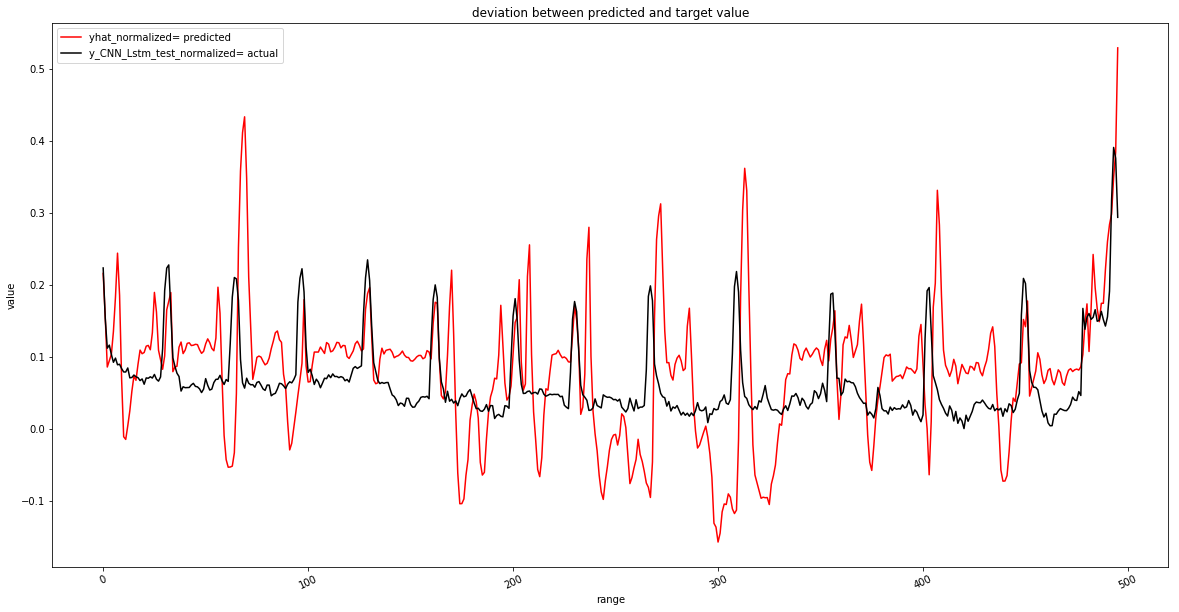

In [338]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(y_CNN_Lstm_test_normalized,yhat_normalized)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))

# my_data_1.index[0:-1]
plt.plot(yhat_normalized,color='red')
plt.plot(y_CNN_Lstm_test_normalized,color='black')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['yhat_normalized= predicted', 'y_CNN_Lstm_test_normalized= actual'], loc='upper left')
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Unnormalize data to test

In [342]:
# finding max value from each column
max_array=[]
i=0
for idx,val in enumerate(list(multivariate_data_drop_zero.columns)):
    x=multivariate_data_drop_zero[val].max()
    q=[val,x]
    max_array.append(q)

In [343]:
max_array

[['DEWIHOBT9_I0', 100.0],
 ['AEDATZ_HO_V0', 61.94729716820025],
 ['RWWIHOB_HWT0', 98.14219609603451],
 ['RWWIHOB_MWT0', 98.22370624880494],
 ['AEWIHO_T9AV2', 98.55385680130868],
 ['AEDAHO_T9_V2', 92.06695562021443]]

In [344]:
target_column_max_value=max_array[-1][-1]

In [345]:
target_column_max_value

92.06695562021443

In [346]:
unnormalized_yhat=yhat_normalized*target_column_max_value
unnormalized_y_CNN_Lstm_test=y_CNN_Lstm_test_normalized*target_column_max_value

In [348]:
print(unnormalized_yhat.shape)
print(unnormalized_y_CNN_Lstm_test.shape)

(496, 1)
(496,)


In [351]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(unnormalized_y_CNN_Lstm_test[0:100],unnormalized_yhat[0:100])
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(unnormalized_y_CNN_Lstm_test[0:100],unnormalized_yhat[0:100])
print('Mean Absolute Error: ',Error_1)

mean squared error:  82.45130103963596
RMSE Error:  9.080269877026561
Mean Absolute Error:  6.572370204256023


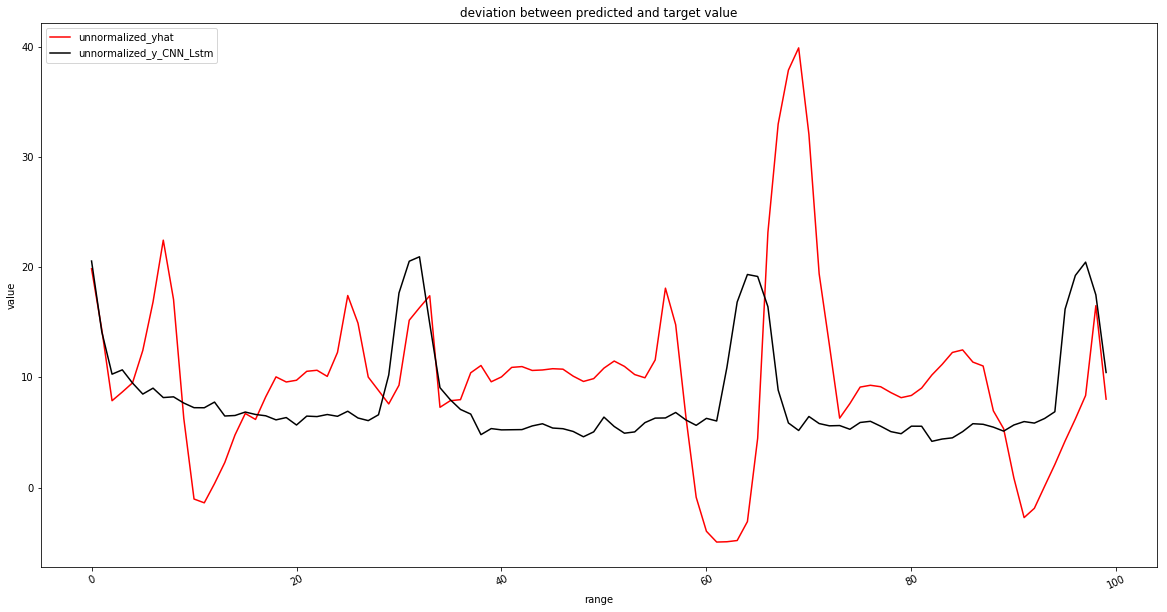

In [352]:
plt.plot(unnormalized_yhat[0:100],color='red')
plt.plot(unnormalized_y_CNN_Lstm_test[0:100],color='black')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['unnormalized_yhat', 'unnormalized_y_CNN_Lstm'], loc='upper left')
plt.show()

In [356]:
def do_reshape(ready_ip_1):
    global n_seq,n_steps_2
    x_input = ready_ip_1.reshape((ready_ip_1.shape[0], n_seq, n_steps_2, ready_ip_1.shape[-1]))
    return x_input

def make_test_set(start,end,multivariate_column_label):
    global test_new
    test_dataset=test_new.iloc[start:end][multivariate_column_label]
    test_dataset=test_dataset.loc[::-1]
    mean_value=test_dataset.mean()
    test_dataset_mean= test_dataset.replace(0,mean_value)
    global min_max_scaler
    np_scaled_1 = min_max_scaler.fit_transform(test_dataset_mean)
    df_normalized_1 = pd.DataFrame(np_scaled_1,columns=multivariate_column_label)
    df_normalized_2=np.array(df_normalized_1)
    ready_ip,ready_op=split_sequence(df_normalized_2,n_steps_1)
    reshaped_input=do_reshape(ready_ip)
    
    return test_dataset_mean,reshaped_input,ready_op


mean_data,reshaped_ip,real_op=make_test_set(18000,20000,multivariate_column_label)

my_data_array=np.array(norm_data)
# ready_ip,ready_op=split_sequence(my_data_array,n_steps_1)

# reshaped_input=do_reshape(ready_ip)

NameError: name 'norm_data' is not defined

In [354]:
mean_data.head()

,DEWIHOBT9_I0,AEDATZ_HO_V0,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2,AEDAHO_T9_V2
dateTime,,,,,,
2019-03-20 14:00:00,100.0,58.849192,94.396188,95.335312,82.164653,80.655537
2019-03-20 14:01:00,100.0,59.596989,94.341811,95.239170,84.719391,81.089756
2019-03-20 14:02:00,100.0,57.521160,94.311420,95.184683,85.343840,80.335200
2019-03-20 14:03:00,100.0,55.506700,94.240242,95.167058,85.319617,75.924448
2019-03-20 14:04:00,100.0,54.717202,94.092291,95.045271,84.241223,73.998452


In [355]:
print(reshaped_input.shape)

NameError: name 'reshaped_input' is not defined

In [ ]:
maximum_val=real_op.max()
print(maximum_val)
yhat_new=cnn_lstm.predict(reshaped_input, verbose=1)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(real_op,yhat_new)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(real_op,yhat_new)
print('Mean Absolute Error: ',Error_1)

In [ ]:
plt.plot(yhat_new,color='green')
plt.plot(real_op,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['predicted_op', 'actual_op'], loc='upper left')
plt.show()

In [ ]:
# finding max value from each column
max_array_1=[]
i=0
for idx,val in enumerate(list(multivariate_data_mean.columns)):
    x=mean_data[val].max()
    q=[val,x]
    max_array_1.append(q)

In [ ]:
max_array_1

In [ ]:
target_max=max_array_1[-1][-1]

In [ ]:
unnormalized_prdicted=yhat_new*target_max
unnormalized_actual_op=real_op*target_max

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(unnormalized_actual_op,unnormalized_prdicted)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(unnormalized_actual_op,unnormalized_prdicted)
print('Mean Absolute Error: ',Error_1)

In [ ]:
plt.plot(unnormalized_prdicted,color='green')
plt.plot(unnormalized_actual_op,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['predicted_op', 'actual_op'], loc='upper left')
plt.show()